In [1]:
import pathlib
import dill
import pickle
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
path = pathlib.Path('exp_results')
files = list(path.glob("*.dill"))

In [3]:
def parse_file(f):
    split_name = f.name.split("_")
    noise = float(split_name[1])
    dt = float(split_name[-1][:-5])
    with open(f,'rb') as path:
        result = pickle.load(path)
    d = result['coeff_mets']
    d.update(result['data_mets'])
    d['noise'] = np.around(np.array(noise),3)
    d['dt'] = np.around(np.array(dt),3)
    return d

In [4]:
results = [parse_file(f) for f in files]

In [5]:
df = pd.DataFrame(results)
df = df.astype('float')

In [6]:
df

,precision,recall,f1,coeff_rel_l2,coeff_rmse,coeff_mae,mse,rmse,mae,max_abs_error,normalized_mse,relative_l2_error,noise,dt
0,0.233333,1.000000,0.378378,4.342358e+01,249.966865,1.511583e+02,7.730392e+07,8792.264582,5461.220144,52331.732999,1.987071e+04,1.409410e+02,20.0,0.20
1,0.280000,1.000000,0.437500,7.491152e+00,43.122648,1.432338e+01,2.641861e+03,51.399041,22.621099,606.044674,6.790816e-01,8.239327e-01,8.0,0.14
2,1.000000,1.000000,1.000000,9.278842e-06,0.000053,1.688861e-05,2.027072e-07,0.000450,0.000305,0.002372,5.210521e-11,7.217243e-06,0.0,0.10
3,0.545455,0.857143,0.666667,8.870779e-01,5.106444,1.669834e+00,9.715108e+01,9.856525,7.409479,41.793672,2.497235e-02,1.580012e-01,18.0,0.10
4,0.318182,1.000000,0.482759,8.732022e+00,50.265692,1.976429e+01,1.903347e+04,137.961859,50.925826,1220.392411,4.892490e+00,2.211545e+00,20.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.777778,1.000000,0.875000,1.382308e-01,0.795723,2.468094e-01,4.007236e+01,6.330273,4.452754,27.841821,1.030046e-02,1.014750e-01,18.0,0.04
106,0.437500,1.000000,0.608696,1.833914e+00,10.556885,3.127146e+00,1.550998e+02,12.453907,8.812796,47.164998,3.986788e-02,1.996376e-01,6.0,0.20
107,1.000000,1.000000,1.000000,3.178745e-07,0.000002,4.865465e-07,7.138369e-11,0.000008,0.000007,0.000035,1.834894e-14,1.354366e-07,0.0,0.12
108,0.545455,0.857143,0.666667,8.082458e-01,4.652649,1.602201e+00,1.212990e+02,11.013584,8.279187,56.662523,3.117950e-02,1.765490e-01,16.0,0.12


<Axes: xlabel='noise', ylabel='dt'>

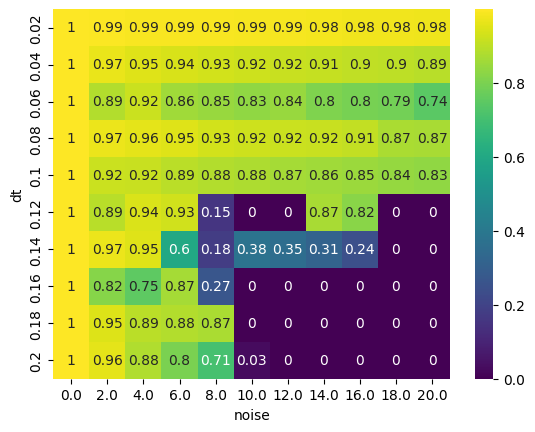

In [7]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='relative_l2_error')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

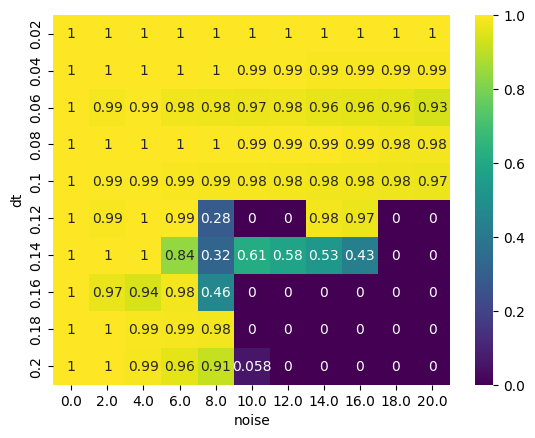

In [8]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='normalized_mse')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")


<Axes: xlabel='noise', ylabel='dt'>

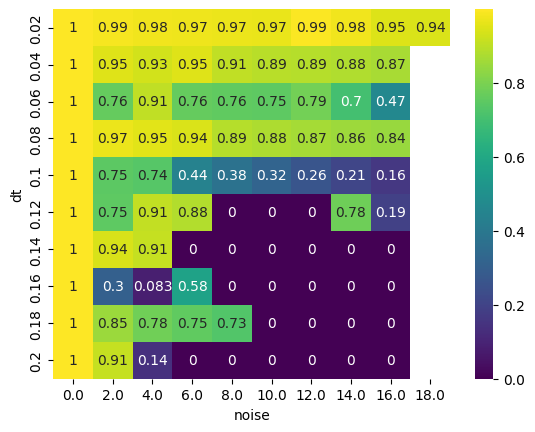

In [9]:
pivot_df = df.pivot_table(index='dt', columns='noise', values='coeff_rel_l2')
pivot_df = 1-np.clip(pivot_df,0,1)
sns.heatmap(pivot_df,annot=True, cmap="viridis")
